<a href="https://colab.research.google.com/github/pascuapablo/CEIA/blob/master/scripts/Clase_2_Dataset_y_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [4]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:01, 50.0MB/s]


In [5]:
!unzip -o /content/perros_y_gatos.zip  > /dev/null

In [6]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [7]:
cd /content

/content


In [8]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [10]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 20
EPOCHS = 20

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend as K 
from tensorflow.keras import optimizers

In [27]:
def buildModel():
  K.clear_session()
  
  model = models.Sequential()

  #### COMPLETAR #####

  model.add(layers.Conv2D(32, (3,3), activation='relu', padding ='same',input_shape=(150,150,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3),  padding ='same', activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3),  padding ='same',activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), padding ='same',activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1, activation='relu'))

  # compilar el modelo con binary_crossentropy y optimizador RMSprop con
  # learning rate 1e-4, la métrica a usar es la accuracy (acc)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])


  
  return model



In [14]:
try:
  del model
except: 
  pass

model = buildModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
# utilizar model.fit_generator para entrenar
history = model.fit(
      train_generator,
      # steps_per_epoch=100,
      epochs=EPOCHS,
      validation_data=validation_generator,
      # validation_steps=
      )

Epoch 1/20
100/100 [==============================] - 9s 93ms/step - loss: 0.6957 - acc: 0.5705 - val_loss: 0.6640 - val_acc: 0.5850
Epoch 2/20
100/100 [==============================] - 9s 93ms/step - loss: 0.6629 - acc: 0.6115 - val_loss: 0.6342 - val_acc: 0.6550
Epoch 3/20
100/100 [==============================] - 9s 91ms/step - loss: 0.6417 - acc: 0.6325 - val_loss: 0.6495 - val_acc: 0.5920
Epoch 4/20
100/100 [==============================] - 9s 92ms/step - loss: 0.6045 - acc: 0.6565 - val_loss: 0.6127 - val_acc: 0.6520
Epoch 5/20
100/100 [==============================] - 9s 92ms/step - loss: 0.5978 - acc: 0.7010 - val_loss: 0.5927 - val_acc: 0.6800
Epoch 6/20
100/100 [==============================] - 9s 91ms/step - loss: 0.5616 - acc: 0.7250 - val_loss: 0.5843 - val_acc: 0.7030
Epoch 7/20
100/100 [==============================] - 9s 91ms/step - loss: 0.5091 - acc: 0.7550 - val_loss: 0.5977 - val_acc: 0.7040
Epoch 8/20
100/100 [==============================] - 9s 93ms/step - 

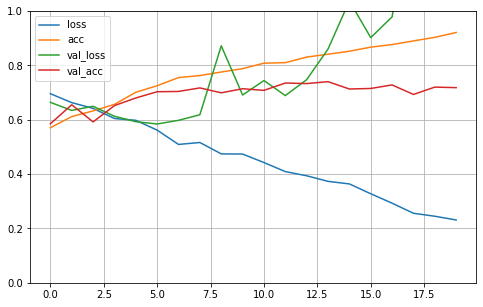

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=20,
    zoom_range = 20,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    )

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')


Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [33]:
try:
  del model2
except: 
  pass
model2 = buildModel()

In [34]:
history2 = model2.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator,
      )

Epoch 1/20
100/100 [==============================] - 21s 207ms/step - loss: 0.7532 - acc: 0.5040 - val_loss: 0.6685 - val_acc: 0.5830
Epoch 2/20
100/100 [==============================] - 20s 204ms/step - loss: 0.7229 - acc: 0.5375 - val_loss: 0.7163 - val_acc: 0.5240
Epoch 3/20
100/100 [==============================] - 20s 202ms/step - loss: 0.6965 - acc: 0.5400 - val_loss: 0.6610 - val_acc: 0.6110
Epoch 4/20
100/100 [==============================] - 20s 202ms/step - loss: 0.7096 - acc: 0.5520 - val_loss: 0.6702 - val_acc: 0.5800
Epoch 5/20
100/100 [==============================] - 20s 200ms/step - loss: 0.7033 - acc: 0.5695 - val_loss: 1.0190 - val_acc: 0.5110
Epoch 6/20
100/100 [==============================] - 20s 201ms/step - loss: 0.7026 - acc: 0.5740 - val_loss: 0.6542 - val_acc: 0.5900
Epoch 7/20
100/100 [==============================] - 20s 202ms/step - loss: 0.6940 - acc: 0.5640 - val_loss: 0.6866 - val_acc: 0.5570
Epoch 8/20
100/100 [==============================] - 2

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range = 50,
    horizontal_flip = True,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4
    )

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')


try:
  del model3
except: 
  pass
model3 = buildModel()

history3 = model2.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator,
      )

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()